<a href="https://colab.research.google.com/github/RiteshopShrivastava/Neural_Network/blob/main/Assignment_NN_ForestFires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS**

In [1]:
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV, KFold

In [2]:
data = pd.read_csv('forestfires.csv')

In [ ]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


# **EDA**

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [3]:
import seaborn as sns

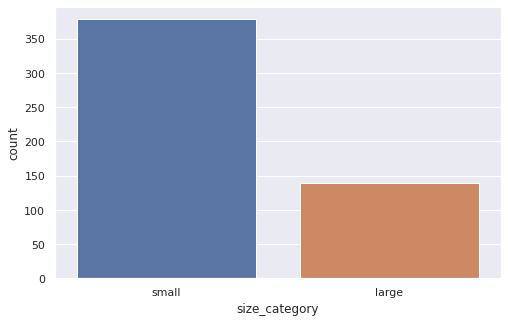

In [4]:
sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(x=data['size_category']);

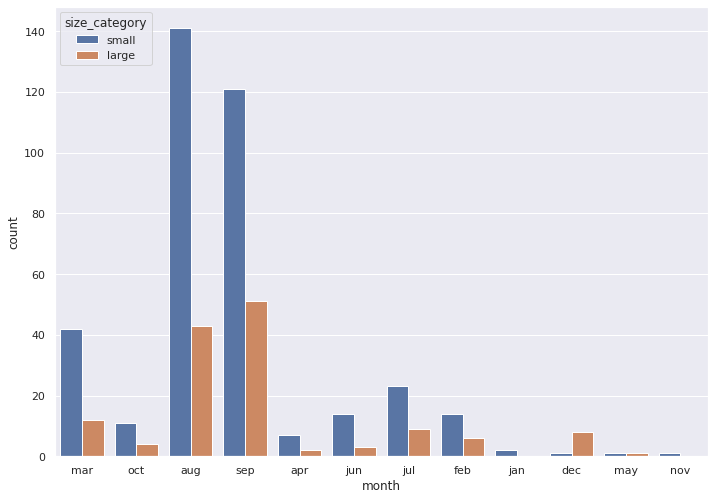

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=data['month'],hue=data['size_category']);

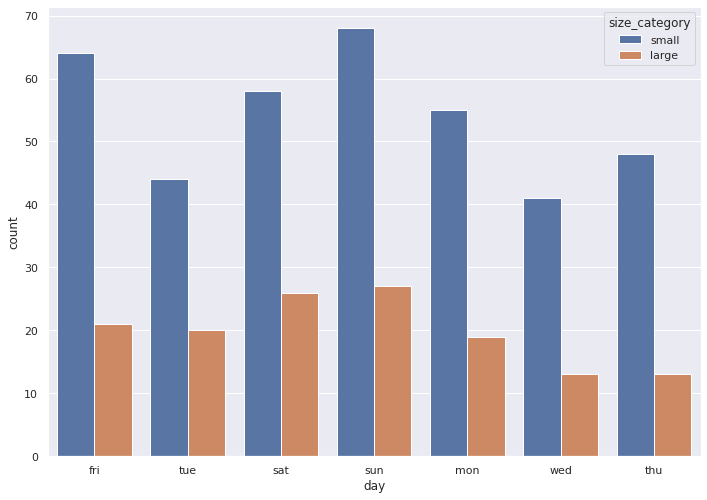

In [ ]:
sns.countplot(x=data['day'],hue=data['size_category']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


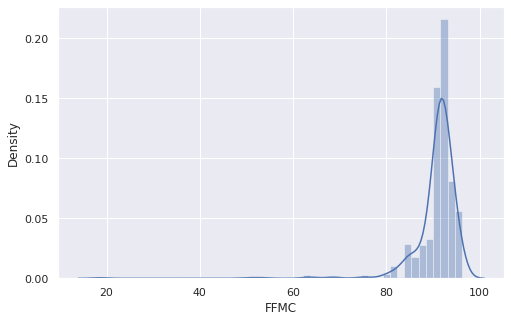

In [ ]:
sns.distplot(x=data['FFMC'],axlabel='FFMC');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


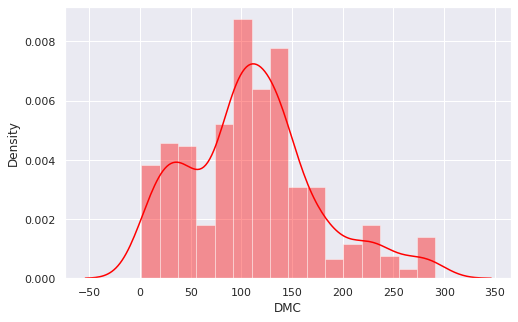

In [ ]:
sns.distplot(x=data['DMC'],axlabel='DMC', color='red');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


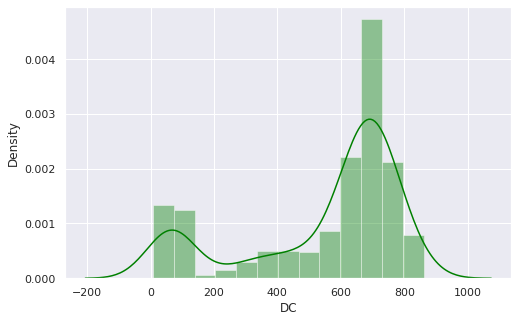

In [ ]:
sns.distplot(x=data['DC'],axlabel='DC',color='green');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


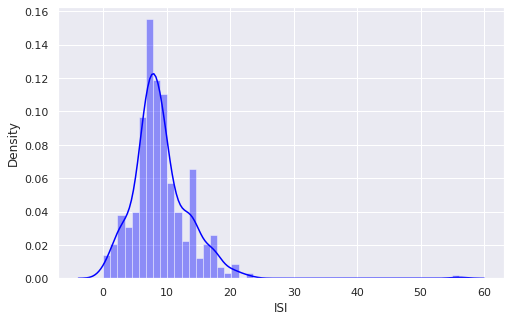

In [ ]:
sns.distplot(x=data['ISI'],axlabel='ISI',color='blue');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


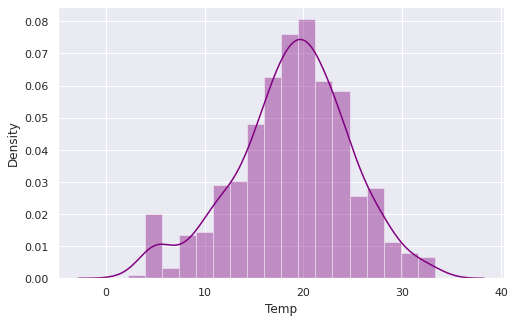

In [ ]:
sns.distplot(x=data['temp'],axlabel='Temp',color='purple');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


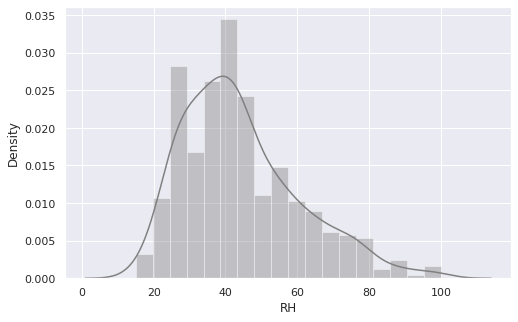

In [ ]:
sns.distplot(x=data['RH'],axlabel='RH',color='grey');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


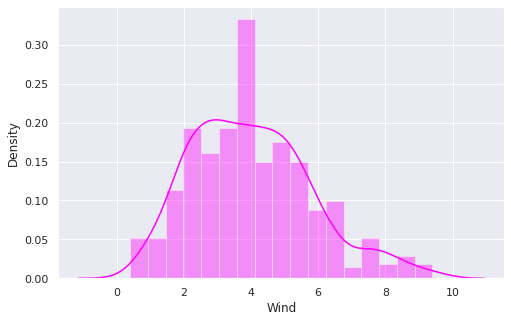

In [ ]:
sns.distplot(x=data['wind'],axlabel='Wind',color='magenta');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


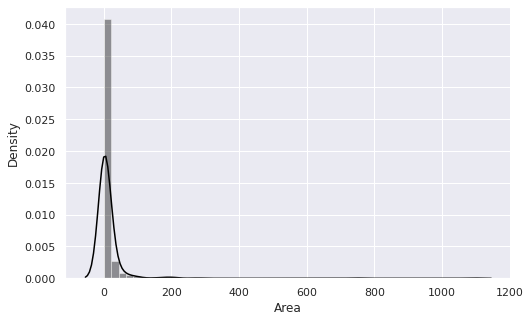

In [ ]:
sns.distplot(x=data['area'],axlabel='Area',color='black');

In [5]:
data1= data.drop(['month','day'], axis=1)

In [ ]:
data1

In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data1['size_category']= label_encoder.fit_transform(data1['size_category'])

In [7]:
data1

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


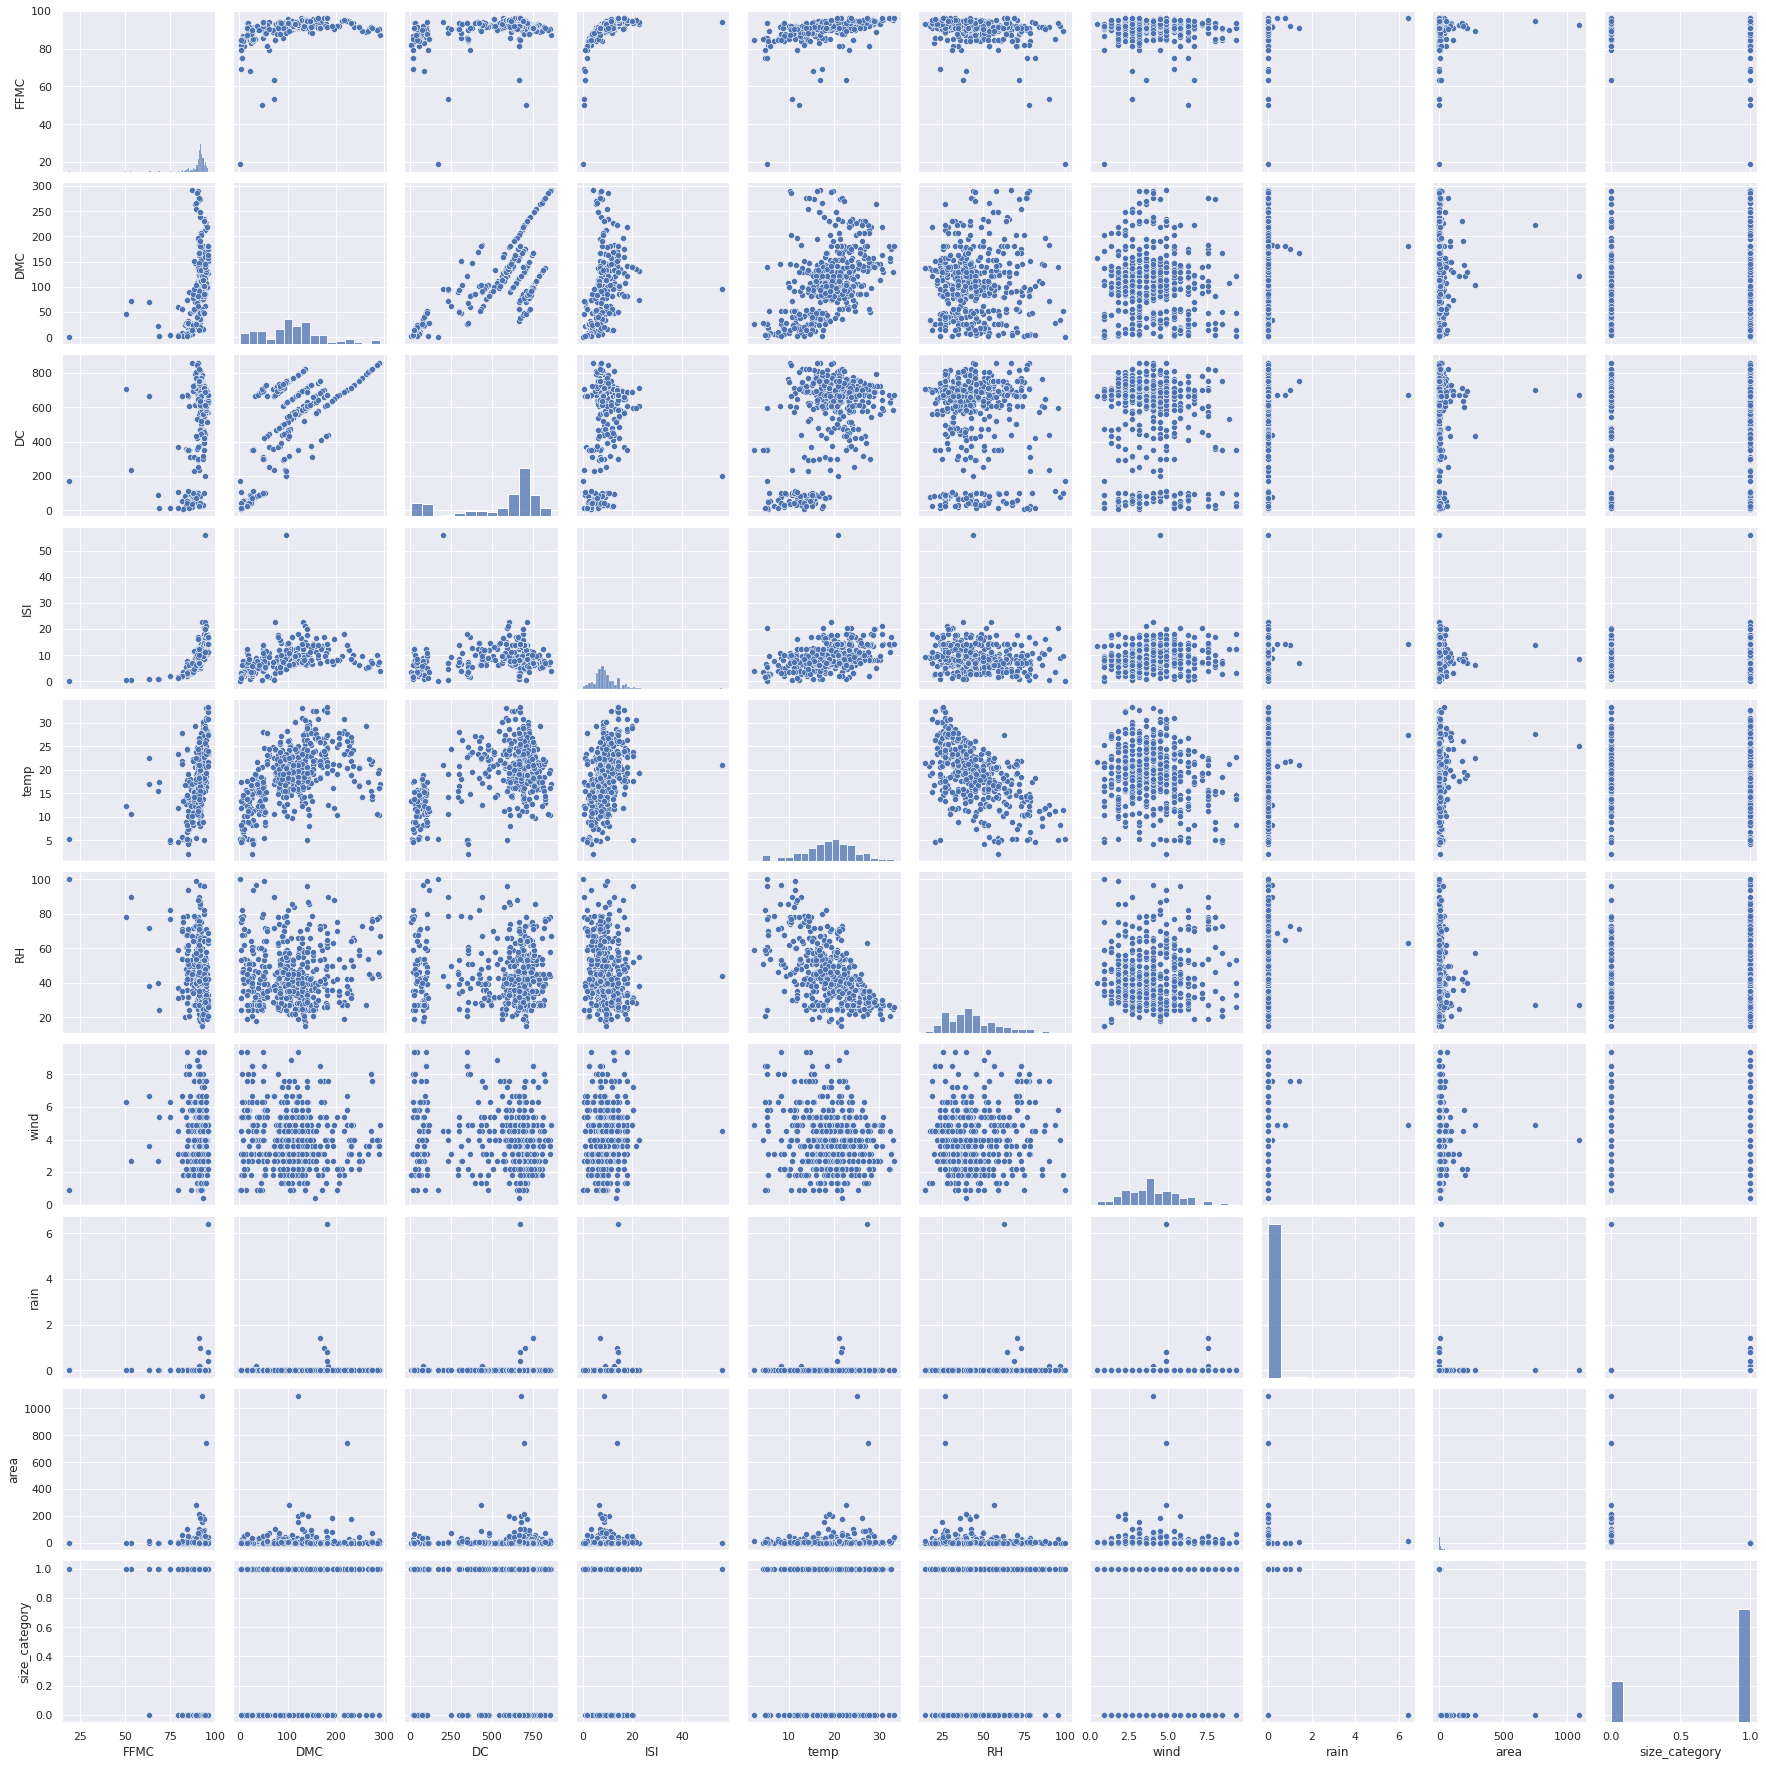

In [ ]:
pairplot_df= pd.concat([data1.iloc[:,0:9], data1.iloc[:,-1]], axis=1)
sns.pairplot(pairplot_df)

In [8]:
X= data1.iloc[:,0:28]
Y= data1.iloc[:,28:]

In [ ]:
X

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [20]:
Y

,size_category
0,1
1,1
2,1
3,1
4,1
...,...
512,0
513,0
514,0
515,1


In [9]:
scaler= StandardScaler()
scaler.fit(X)
X_standarized = scaler.transform(X)

In [ ]:
X_standarized

array([[-8.05959472e-01, -1.32332557e+00, -1.83047676e+00, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-8.10203395e-03, -1.17954077e+00,  4.88890915e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       [-8.10203395e-03, -1.04982188e+00,  5.60715454e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       ...,
       [-1.64008316e+00, -8.46647711e-01,  4.74768113e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [ 6.80956663e-01,  5.49002541e-01,  2.69382214e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-2.02087875e+00, -1.68591332e+00, -1.78044169e+00, ...,
         2.27156334e+01, -1.72859706e-01, -7.06081245e-01]])

# **Model Building**

In [10]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dropout
from sklearn.metrics import accuracy_score

**Tuning of Hyperparameter : Batch size and Epoch**

In [ ]:
def create_model():
  model= Sequential()
  model.add(Dense(8,input_dim=28, kernel_initializer='uniform', activation='relu'))
  model.add(Dropout(0.01))
  model.add(Dense(4, kernel_initializer='uniform', activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
  adam= Adam(learning_rate=0.001)
  model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
  return model

model= KerasClassifier(build_fn=create_model, verbose=0)

batch_size= [10,30,50]
epochs = [10,20,30]
param_grid = dict( batch_size= batch_size, epochs= epochs)
gsv = GridSearchCV( estimator=model, param_grid=param_grid, cv=KFold(), verbose=5)
gsv_result = gsv.fit(X_standarized, Y)

In [ ]:
print(gsv_result.best_score_, gsv_result.best_params_)

0.8198655724525452 {'batch_size': 10, 'epochs': 30}


**Tuning of Hyperparameter : Learning rate & Dropout rate**

In [ ]:
def create_model(learning_rate, dropout_rate):
  model= Sequential()
  model.add(Dense(8,input_dim=28, kernel_initializer='uniform', activation='relu'))
  model.add(Dropout(0.01))
  model.add(Dense(4, kernel_initializer='uniform', activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
  adam= Adam(learning_rate=learning_rate)
  model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
  return model

model= KerasClassifier(build_fn=create_model, batch_size=10, epochs=30, verbose=0)

learning_rate= [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]
param_grid = dict( learning_rate=learning_rate, dropout_rate= dropout_rate)
gsv = GridSearchCV( estimator=model, param_grid=param_grid, cv=KFold(), verbose=5)
gsv_result = gsv.fit(X_standarized, Y)


In [ ]:
print(gsv_result.best_score_, gsv_result.best_params_)

0.9244585514068604 {'dropout_rate': 0.2, 'learning_rate': 0.01}


**Tuning of Hyperparameter :Activation Function & Kernel Initializer**

In [ ]:
def create_model(activation_function, init):
  model= Sequential()
  model.add(Dense(8,input_dim=28, kernel_initializer='uniform', activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(4, kernel_initializer='uniform', activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
  adam= Adam(learning_rate=0.01)
  model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
  return model

model= KerasClassifier(build_fn=create_model, batch_size=10, epochs=30, verbose=0)

activation_function= ['relu', 'tanh','softmax','linear']
init = ['zero', 'uniform','normal']
param_grid = dict( activation_function=activation_function, init= init)
gsv = GridSearchCV( estimator=model, param_grid=param_grid, cv=KFold(), verbose=5)
gsv_result = gsv.fit(X_standarized, Y)

In [ ]:
print(gsv_result.best_score_, gsv_result.best_params_)

0.9225354790687561 {'activation_function': 'softmax', 'init': 'normal'}


**Tuning of Hyperparameter :Number of Neurons in hidden layer**

In [ ]:
def create_model(neuron1, neuron2):
  model= Sequential()
  model.add(Dense(neuron1,input_dim=28, kernel_initializer='normal', activation='softmax'))
  model.add(Dropout(0.2))
  model.add(Dense(neuron2, kernel_initializer='normal', activation='softmax'))
  model.add(Dropout(0.2))
  model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
  adam= Adam(learning_rate=0.01)
  model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
  return model

model= KerasClassifier(build_fn=create_model, batch_size=10, epochs=30, verbose=0)

neuron1= [24,16,8]
neuron2= [12,8,4]
param_grid = dict( neuron1=neuron1, neuron2= neuron2)
gsv = GridSearchCV( estimator=model, param_grid=param_grid, cv=KFold(), verbose=5)
gsv_result = gsv.fit(X_standarized, Y)

In [ ]:
print(gsv_result.best_score_,gsv_result.best_params_)
means = gsv_result.cv_results_['mean_test_score']
stds = gsv_result.cv_results_['std_test_score']
params = gsv_result.cv_results_['params']
for mean, stdev, param in zip ( means, stds, params):
  print('{}, {} with: {}'.format( mean, stdev, param))

0.8935399413108825 {'neuron1': 8, 'neuron2': 4}
0.8411874532699585, 0.0628632175805575 with: {'neuron1': 24, 'neuron2': 12}
0.8373039603233338, 0.07530596665630475 with: {'neuron1': 24, 'neuron2': 8}
0.8412434697151184, 0.0660819050246019 with: {'neuron1': 24, 'neuron2': 4}
0.8625093340873718, 0.05736393125392163 with: {'neuron1': 16, 'neuron2': 12}
0.870294988155365, 0.049269555712646795 with: {'neuron1': 16, 'neuron2': 8}
0.841318142414093, 0.040059608031642296 with: {'neuron1': 16, 'neuron2': 4}
0.8916168928146362, 0.04549949516973946 with: {'neuron1': 8, 'neuron2': 12}
0.8799103856086731, 0.05231612273069608 with: {'neuron1': 8, 'neuron2': 8}
0.8935399413108825, 0.03520521167578629 with: {'neuron1': 8, 'neuron2': 4}


#Training model with optimum values of Hyperparameters

In [16]:
def create_model():
  model= Sequential()
  model.add(Dense(8,input_dim=28, kernel_initializer='normal', activation='softmax'))
  model.add(Dropout(0.2))
  model.add(Dense(4, kernel_initializer='normal', activation='softmax'))
  model.add(Dropout(0.2))
  model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
  adam= Adam(learning_rate=0.01)
  model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
  return model

model= KerasClassifier(build_fn=create_model, batch_size=10, epochs=30, verbose=0)
model.fit(X_standarized, Y)
y_predict = model.predict(X_standarized)
print('Accuracy :',accuracy_score(Y, y_predict))

Accuracy : 0.9787234042553191


**Since due to coputational complexity hyper parameters are optimized two at a time.**

# Below is the code for hyperparameter optimization all at once


In [ ]:
def create_model(learning_rate, dropout_rate,activation_function,init,neuron1, neuron2):
  model= Sequential()
  model.add(Dense(neuron1,input_dim=28, kernel_initializer=init, activation=activation_function))
  model.add(Dropout(dropout_rate))
  model.add(Dense(neuron2, kernel_initializer=init, activation=activation_function))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1, kernel_initializer=init, activation='sigmoid'))
  adam= Adam(learning_rate=learning_rate)
  model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
  return model

model= KerasClassifier(build_fn=create_model, batch_size=batch_size, epochs=epochs,learning_rate=learning_rate,
                       activation_function=activation_function,init=init,neuron1=neuron1,neuron2=neuron2)


batch_size= [10,30,50]
epochs = [10,20,30]
learning_rate= [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]
activation_function= ['relu', 'tanh','softmax','linear']
init = ['zero', 'uniform','normal']
neuron1= [24,16,8]
neuron2= [12,8,4]

param_grid = dict( neuron1=neuron1, neuron2= neuron2)
gsv = GridSearchCV( estimator=model, param_grid=param_grid, cv=KFold(), verbose=5)
gsv_result = gsv.fit(X_standarized, Y)

In [ ]:
print(gsv_result.best_score_,gsv_result.best_params_)
means = gsv_result.cv_results_['mean_test_score']
stds = gsv_result.cv_results_['std_test_score']
params = gsv_result.cv_results_['params']
for mean, stdev, param in zip ( means, stds, params):
  print('{},{} with:{}'.format( mean, stdev, param))